# The Best Neighborhood in Pittsburgh

Our task was to figure out which neighborhood in Pittsburgh, PA is the best out of them all. 

## Metric

We determined that the best way to quantify the 'best' neighborhood is to find the one that is the most happy! In order to determine happiness, we looked at a few key factors in determining a community's happiness. Our goal for our work here is to find a single quantified value for how happy any single neighborhood is.

Let's set up the jupyter notebook using code, algorithms, and magic:

In [1]:
import sys
import pandas as pd
!{sys.executable} -m pip install geopy --user
from geopy.geocoders import Nominatim
import geopy
%matplotlib inline
import matplotlib.pyplot as plt

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Key Happiness Factor

When it comes to happiness, leisure is a top factor. Within leisure, we found multiple amenities that contributed towards the possible leisure of a neighborhood. Those are recreation, exercise, and internet access.

## Recreation

The first amenity to examine is recreation, such as parks and playgrounds. We all know that `more slides = more happy`. So, we looked at the number of documented slides in every neighborhood. We included two types of slides.

#### Slide Type 1: Playground Slides

Who didn't love going down the slides at a playground as a kid?

Let's grab the documented playgrounds from the WPRDC.

In [2]:
playgrounds = pd.read_csv("https://data.wprdc.org/dataset/640add54-b0e1-4abb-a232-f5092b243ee0/resource/40097711-aa25-47d9-b0fb-920cace3afa0/download/opendata-pubworks-play-area-listing-2015.csv")
playgrounds.head(3)

,Play area name,Facility,Address,Neighborhood,Dedicated Park,AKA Name,Spring Rider,Modular 2-5,Modular 5-12,Modular 2-12,...,Swing Baby,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Able Long Parklet,ABLE LONG PARKLET,Coast & Gagwin St.,Beechview,Western,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Albert ""Turk"" Graham Parklet","ALBERT ""TURK"" GRAHAM PARKLET",Foreside & Vine St.,Crawford Roberts,Schenley,NaN,NaN,1.0,1.0,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sue Murray,ALLEGHENY COMMONS PARK,Ceadar Ave,Allegheny Center,State,NaN,3.0,NaN,1.0,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


That's not very useful on its own and stuff so let's pandas

In [3]:
playgrounds.groupby('Neighborhood').count().head(3)

,Play area name,Facility,Address,Dedicated Park,AKA Name,Spring Rider,Modular 2-5,Modular 5-12,Modular 2-12,Swing Frame,...,Swing Baby,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Allegheny Center,4,4,4,4,0,1,3,4,0,4,...,4,0,0,0,0,0,0,0,0,0
Allentown,1,1,1,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
Banksville,2,2,2,2,0,0,1,1,1,2,...,2,0,0,0,0,0,0,0,0,0


Better! But not quite. All these numbers are kinda strange and inconsistent. But, each play area is only named once, so by counting the names of play areas, we can find the number of play areas in a given neighborhood. We're going to assume an average of 1 slide per playground per neighborhood.

In [4]:
playgrounds.groupby("Neighborhood").count().loc[:,"Play area name"][:7]

Neighborhood
Allegheny Center     4
Allentown            1
Banksville           2
Bedford Dwellings    1
Beechview            5
Beltzhoover          3
Bloomfield           2
Name: Play area name, dtype: int64

And we can sort it:

In [5]:
playground_series = playgrounds.groupby("Neighborhood").count().loc[:,"Play area name"].sort_values(ascending=False)
playground_series[:7]

Neighborhood
Squirrel Hill South    9
Southside Slopes       5
Beechview              5
Allegheny Center       4
Hazelwood              4
Highland Park          4
Sheraden               4
Name: Play area name, dtype: int64

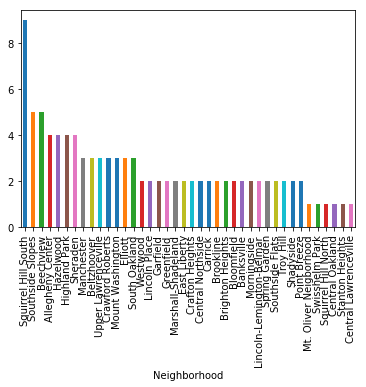

In [6]:
playground_series[:40].plot.bar()

Let's scale it down to a number that we can use later.

In [7]:
max_val = playground_series[0]
playground_values = playground_series.divide(max_val)
playground_values[:7]

Neighborhood
Squirrel Hill South    1.000000
Southside Slopes       0.555556
Beechview              0.555556
Allegheny Center       0.444444
Hazelwood              0.444444
Highland Park          0.444444
Sheraden               0.444444
Name: Play area name, dtype: float64



---

#### Slide Type 2: Landslides

Slides are more fun when they're on the ground, and we needed to be thourough. So, we got the dataset for _land_slides, as `more slides = more happy`. Let's take a look at how landslides positively impact the happiness rating of a neighborhood.

In [8]:
landslides = pd.read_csv("https://data.wprdc.org/dataset/7db7daf4-1fcc-4ad6-ad5e-6ed21a45b154/resource/dde1f413-c849-413c-b791-0f861bf219ce/download/globallandslides.csv")
pgh_landslides = landslides.groupby('ev_id').filter(lambda x: x['gaz_point'] == 'Pittsburgh')
pgh_landslides.head(3)

,src_name,src_link,ev_id,ev_date,ev_time,ev_title,ev_desc,loc_desc,loc_accu,ls_cat,...,ev_imp_id,latitude,longitude,ctry_name,ctry_code,div_name,gaz_point,gaz_dist,sub_date,edit_date
270,www.post-gazette.com,http://www.post-gazette.com/stories/local/neig...,"4,724",2013-01-17,NaN,"Merrimac Street To Saw Mill Run, Pittsburgh, Pa",A mudslide has closed Woodruff Street from Mer...,"Merrimac Street To Saw Mill Run, Pittsburgh, Pa",5km,mudslide,...,4724.0,40.423900,-80.018100,United States,US,Pennsylvania,Pittsburgh,8.31,2014-04-01,2018-06-23
836,Channel 11 News WPXI,http://www.wpxi.com/news/rock-slide-closes-all...,"10,266",2017-01-24,unknown,"Allegheny River Boulevard Rock Slide, between ...",There has been at least a trace of rainfall in...,"PA-130, Verona, Pennsylvania, 15147",1km,rock_fall,...,NaN,40.483442,-79.864762,United States,US,Pennsylvania,Pittsburgh,11.31,2017-10-20,2018-06-23
1748,CBS Pittsburgh,http://pittsburgh.cbslocal.com/2017/02/11/rock...,"10,259",2017-02-11,unknown,Saxonburg Boulevard Rock Fall in 900 block,Vehicles were forced to veer around a large ch...,"900 Saxonburg Blvd, Cheswick, Pennsylvania, 15024",exact,rock_fall,...,NaN,40.623644,-79.865525,United States,US,Pennsylvania,Pittsburgh,17.94,2017-10-20,2018-06-23


Cool! But what we really need from this dataset are the latitude and longitude. We can then use the package geopy that we installed earlier to get the neigborhood names from the coordinates.

In [9]:
geolocator = Nominatim(user_agent="cmpinf0999-bdr")

locations = pgh_landslides.loc[:,'latitude':'longitude'].to_string(index=False,index_names=False)
locations = [x.replace(' ', ', ') for x in locations.split("\n")[1:]]

neighborhoods = []
for loc in locations:
    response = str(geolocator.reverse(loc))
    #print(response)
    info = response.split(', ')
    if len(info[0]) == 4 or len(info[0]) == 3:
        neighborhoods.append(info[2])
    else:
        neighborhoods.append(info[max(info.index("Allegheny County") - 2,1)])
neighborhoods[:10]

['Mount Washington',
 'Nadine',
 'West Deer Township',
 'Lincoln-Lemington',
 'Elliott',
 'Duquesne Heights',
 'Nadine',
 'South Shore',
 'Mount Washington',
 'South Shore']

Now, we can count the number of landslides that happened in each neighborhood.

In [10]:
landslide_counts = pd.Series(neighborhoods).value_counts()
landslide_counts[:7]

Mount Washington            9
Duquesne Heights            3
Nadine                      3
Elliott                     2
Thornburg                   2
South Shore                 2
Lincoln-Lemington-Belmar    1
dtype: int64

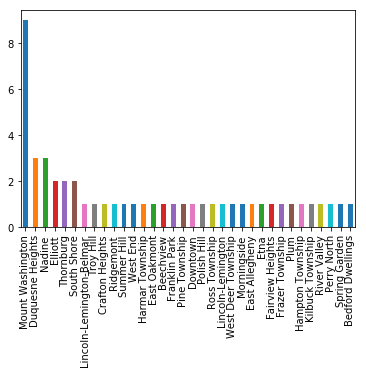

In [11]:
pd.Series(landslide_counts).plot.bar()

Let's scale it down again.

In [12]:
max_val = landslide_counts[0]
landslide_values = pd.Series(landslide_counts).divide(max_val)
landslide_values[:7]

Mount Washington            1.000000
Duquesne Heights            0.333333
Nadine                      0.333333
Elliott                     0.222222
Thornburg                   0.222222
South Shore                 0.222222
Lincoln-Lemington-Belmar    0.111111
dtype: float64

## Steps

Another amenity we found was the number of steps in every neighborhood. Since the average human being hates steps, we concluded that `less steps = more happy`, or inversely `more steps = less happy`. One might argue that some people _do_ like steps, such as olympians, because exercise! That person would be right: **but**, we also concluded that the number of olympians living in the neighborhoods of Pittsburgh is insignificantly small. 

There are a total of 33 olympic athletes who were born in Pittsburgh (https://www.sports-reference.com/olympics/friv/birthplaces.cgi?id=7645). With the current population in Pittsburgh of 302,000, that means that olympians account for a maximum of 0.001% of the population (http://worldpopulationreview.com/us-cities/pittsburgh-population/). Therefore, we can count steps as a measure of unhappiness.

In [13]:
steps = pd.read_csv("https://data.wprdc.org/datastore/dump/43f40ca4-2211-4a12-8b4f-4d052662bb64")

In [14]:
steps.groupby("neighborhood").sum()['number_of_steps'].sort_values(ascending=False)

neighborhood
South Side Slopes           3666.0
Beechview                   2400.0
Perry South                 1798.0
Hazelwood                   1373.0
Greenfield                  1305.0
Marshall-Shadeland          1210.0
Troy Hill                   1115.0
Brookline                   1114.0
Fineview                    1110.0
Mount Washington            1087.0
Overbrook                   1012.0
Polish Hill                  982.0
Spring Hill-City View        946.0
Elliott                      933.0
Sheraden                     887.0
Perry North                  846.0
Carrick                      794.0
California-Kirkbride         742.0
Upper Lawrenceville          713.0
Stanton Heights              671.0
Garfield                     606.0
Upper Hill                   593.0
Homewood North               565.0
Spring Garden                526.0
Lincoln-Lemington-Belmar     495.0
Brighton Heights             487.0
East Allegheny               487.0
Middle Hill                  487.0
West Oa

In [15]:
stepsDF = steps.groupby('neighborhood').sum()
stepsDF = stepsDF.sort_values(['number_of_steps'], ascending = [False])
stepsDF = stepsDF.filter(items = ['name', 'number_of_steps', 'neighborhood'])
stepsDF

,number_of_steps
neighborhood,
South Side Slopes,3666.0
Beechview,2400.0
Perry South,1798.0
Hazelwood,1373.0
Greenfield,1305.0
Marshall-Shadeland,1210.0
Troy Hill,1115.0
Brookline,1114.0
Fineview,1110.0


In [16]:
stepsDF['metric'] = stepsDF['number_of_steps']/3666.0
stepsDF

,number_of_steps,metric
neighborhood,,
South Side Slopes,3666.0,1.000000
Beechview,2400.0,0.654664
Perry South,1798.0,0.490453
Hazelwood,1373.0,0.374523
Greenfield,1305.0,0.355974
Marshall-Shadeland,1210.0,0.330060
Troy Hill,1115.0,0.304146
Brookline,1114.0,0.303873
Fineview,1110.0,0.302782


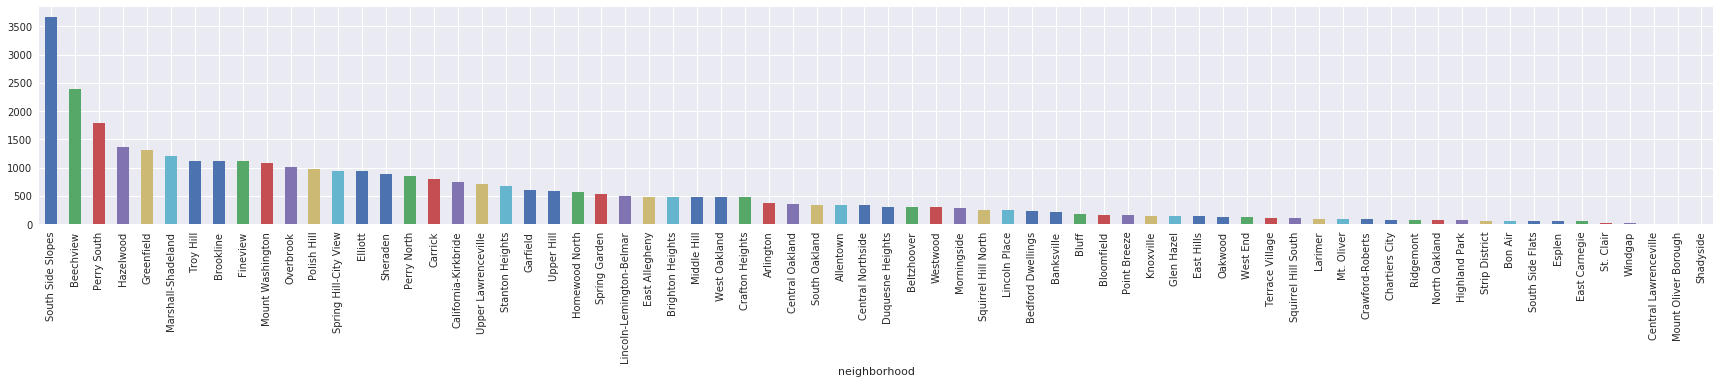

In [17]:
plt.style.use('seaborn')
stepsDF["number_of_steps"].plot.bar(figsize = (30, 4))

## Internet

Up next, an amenity that we can all relate to is _internet speed_. Better internet makes people more happy, so we took a look at average internet speeds in each neighborhood.

In [18]:
providers = pd.read_csv("https://data.wprdc.org/dataset/ae1f7cda-5e15-4a8a-a5b2-2e4803f1500a/resource/c2df1e6f-5563-4e53-9de8-b0e4c7d2cb93/download/pittsburghispsbyblock.csv")
providers.head()

,Neighborhood,GEOID,LogRecNo,Provider_Id,FRN,ProviderName,DBAName,HoldingCompanyName,HocoNum,HocoFinal,StateAbbr,BlockCode,TechCode,Consumer,MaxAdDown,MaxAdUp,Business,MaxCIRDown,MaxCIRUp
0,Bluff,420030103002,257484,20901,4335584,MCI Communications Corporation,MCI,Verizon Communications Inc.,131425,Verizon Communications Inc.,PA,420030103002001,30,0,0.0,0.0,1,3.0,3.0
1,Bluff,420030103002,257485,20901,4335584,MCI Communications Corporation,MCI,Verizon Communications Inc.,131425,Verizon Communications Inc.,PA,420030103002012,30,0,0.0,0.0,1,1.5,1.5
2,Bluff,420030103002,257486,20901,4335584,MCI Communications Corporation,MCI,Verizon Communications Inc.,131425,Verizon Communications Inc.,PA,420030103002017,30,0,0.0,0.0,1,1.5,1.5
3,Bluff,420030103002,257487,20901,4335584,MCI Communications Corporation,MCI,Verizon Communications Inc.,131425,Verizon Communications Inc.,PA,420030103002019,30,0,0.0,0.0,1,3.0,3.0
4,Bluff,420030103003,257488,20901,4335584,MCI Communications Corporation,MCI,Verizon Communications Inc.,131425,Verizon Communications Inc.,PA,420030103003004,30,0,0.0,0.0,1,3.0,3.0


In [19]:
providersDF = providers.filter(items = ['Neighborhood', 'MaxAdDown', 'MaxAdUp'])
providersDF = providersDF.groupby("Neighborhood").sum().sort_values(['MaxAdDown'], ascending = False)
providersDF['metricDown'] = providersDF['MaxAdDown']/80796.768
providersDF['metricUp'] = providersDF['MaxAdUp']/32158.964

providersDF

,MaxAdDown,MaxAdUp,metricDown,metricUp
Neighborhood,,,,
Carrick,80796.768,32158.964,1.000000,1.000000
Brookline,76581.000,29822.028,0.947823,0.927332
Mount Washington,64498.500,25170.600,0.798281,0.782693
Sheraden,55776.000,22292.852,0.690325,0.693208
South Side Flats,53871.000,21137.792,0.666747,0.657291
Bloomfield,53671.000,20920.652,0.664272,0.650539
Shadyside,47050.500,18396.300,0.582331,0.572043
Squirrel Hill South,45495.000,17546.108,0.563079,0.545606
Brighton Heights,44685.500,17606.844,0.553060,0.547494


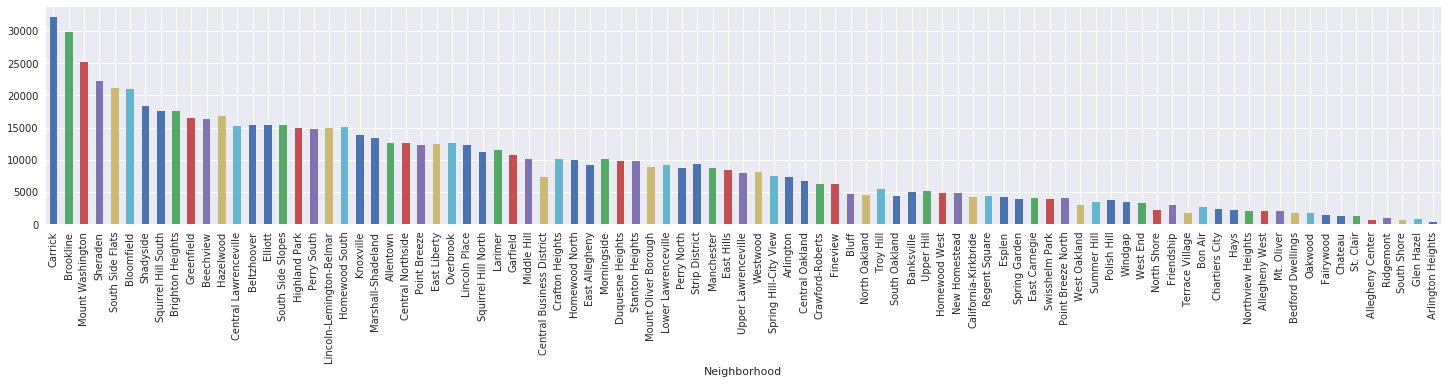

In [20]:
providersDF["MaxAdUp"].plot.bar(figsize = (25, 4))

In [21]:
providersDF = providersDF.sort_values(['Neighborhood'], ascending = [True])
metrics = providersDF
metrics['number_of_steps'] = stepsDF['number_of_steps']
metrics['steps_metric'] = stepsDF['metric']
metrics = metrics.sort_values(['MaxAdDown'], ascending = [False])
netAndStepsDF = providersDF.drop(columns = ['metricDown', 'metricUp'])

netAndStepsDF[:5]

,MaxAdDown,MaxAdUp,number_of_steps,steps_metric
Neighborhood,,,,
Allegheny Center,2782.0,721.388,NaN,NaN
Allegheny West,5527.0,2047.804,NaN,NaN
Allentown,32635.5,12592.220,335.0,0.091380
Arlington,18733.5,7393.720,376.0,0.102564
Arlington Heights,1012.0,369.336,NaN,NaN


In [22]:
metrics[:5]

,MaxAdDown,MaxAdUp,metricDown,metricUp,number_of_steps,steps_metric
Neighborhood,,,,,,
Carrick,80796.768,32158.964,1.000000,1.000000,794.0,0.216585
Brookline,76581.000,29822.028,0.947823,0.927332,1114.0,0.303873
Mount Washington,64498.500,25170.600,0.798281,0.782693,1087.0,0.296508
Sheraden,55776.000,22292.852,0.690325,0.693208,887.0,0.241953
South Side Flats,53871.000,21137.792,0.666747,0.657291,56.0,0.015276


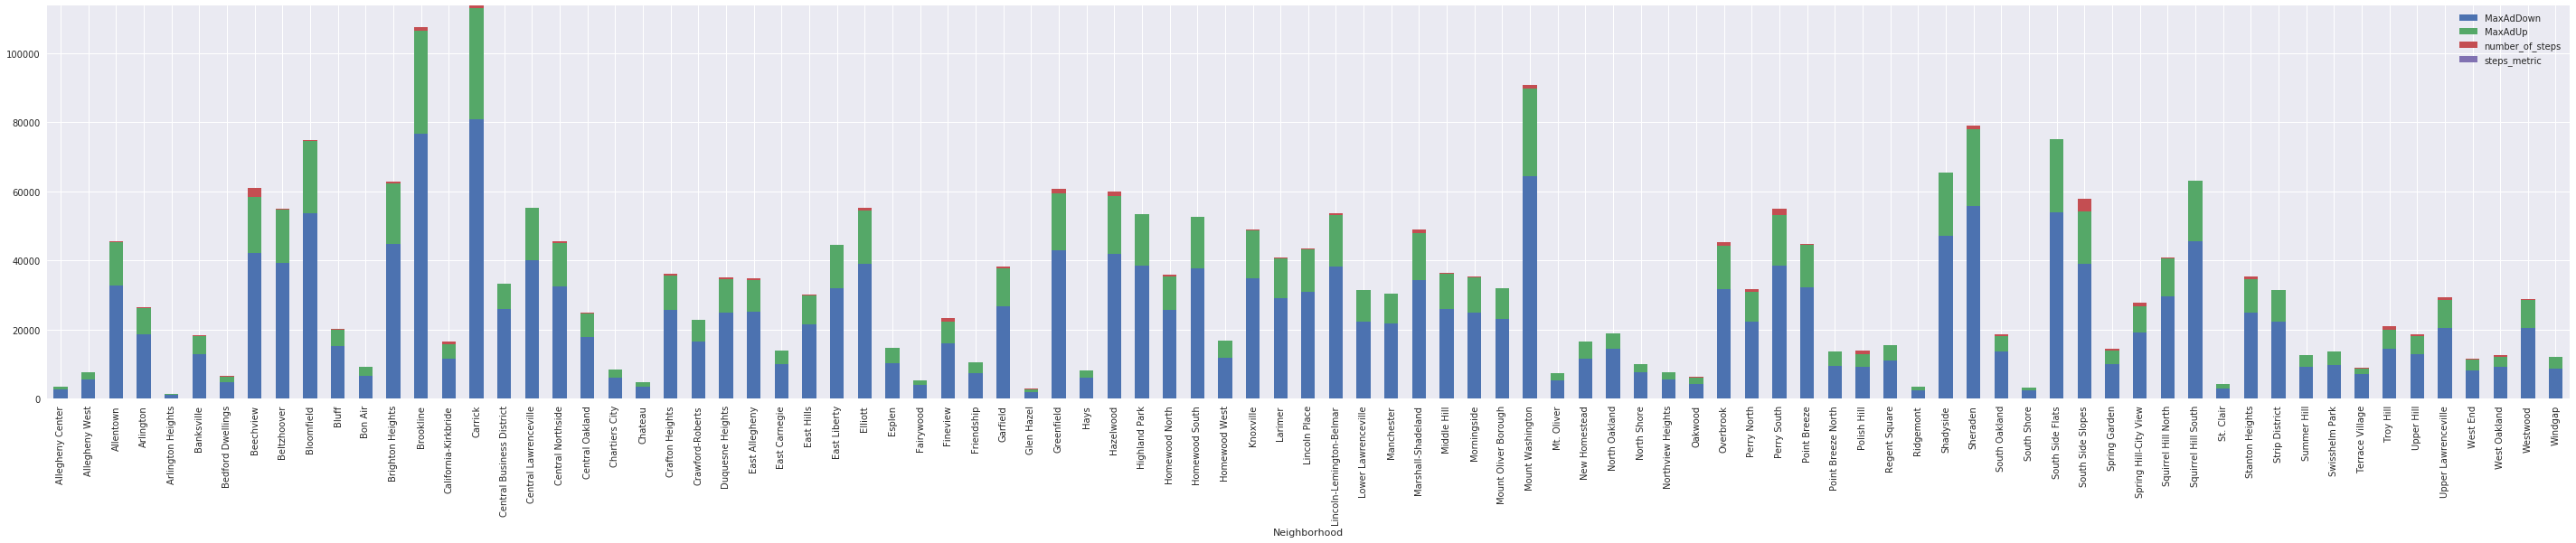

In [23]:
netAndStepsDF.plot.bar(stacked = True, figsize = (50, 8))

In [24]:
metrics['final_metric_(net_and_steps)'] = metrics['metricDown'] + metrics['metricUp'] - metrics['steps_metric']
metrics = metrics.fillna(0)
metrics

,MaxAdDown,MaxAdUp,metricDown,metricUp,number_of_steps,steps_metric,final_metric_(net_and_steps)
Neighborhood,,,,,,,
Carrick,80796.768,32158.964,1.000000,1.000000,794.0,0.216585,1.783415
Brookline,76581.000,29822.028,0.947823,0.927332,1114.0,0.303873,1.571281
Mount Washington,64498.500,25170.600,0.798281,0.782693,1087.0,0.296508,1.284465
Sheraden,55776.000,22292.852,0.690325,0.693208,887.0,0.241953,1.141580
South Side Flats,53871.000,21137.792,0.666747,0.657291,56.0,0.015276,1.308762
Bloomfield,53671.000,20920.652,0.664272,0.650539,161.0,0.043917,1.270893
Shadyside,47050.500,18396.300,0.582331,0.572043,0.0,0.000000,1.154374
Squirrel Hill South,45495.000,17546.108,0.563079,0.545606,105.0,0.028642,1.080043
Brighton Heights,44685.500,17606.844,0.553060,0.547494,487.0,0.132842,0.967712


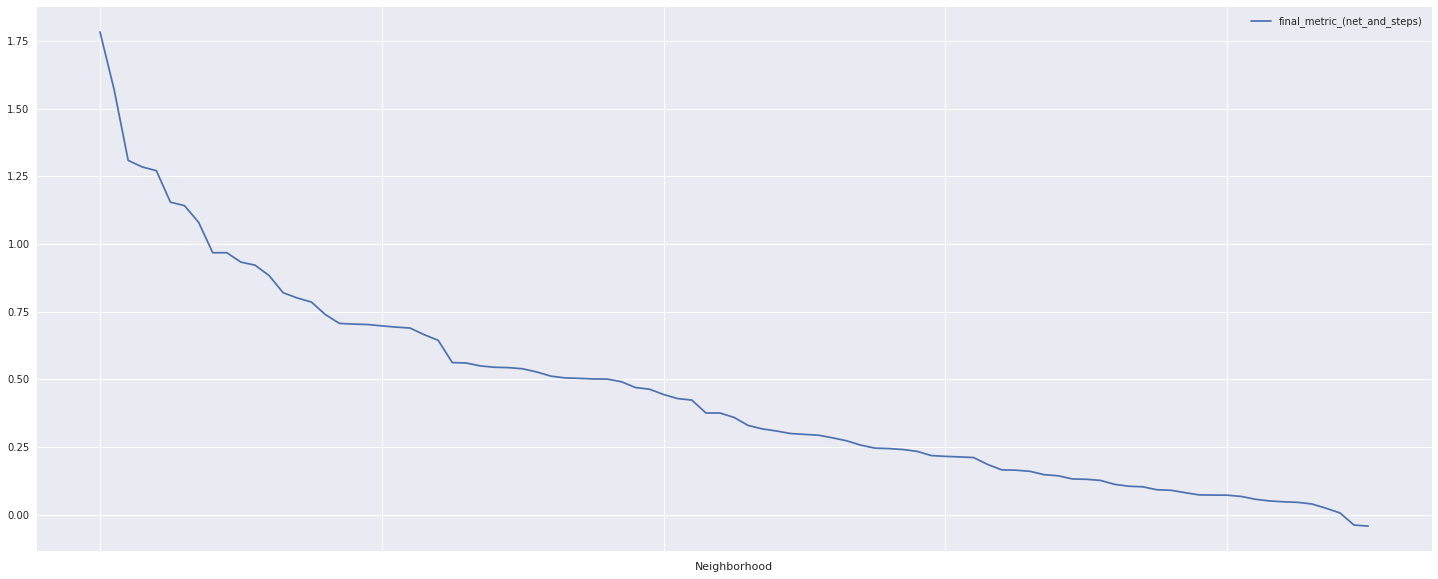

In [25]:
metrics['final_metric_(net_and_steps)'] = metrics['metricDown'] + metrics['metricUp'] - metrics['steps_metric'] # make a new column with aggregated metrics
metrics = metrics.fillna(0)
metrics = metrics.sort_values(['final_metric_(net_and_steps)'], ascending = False) # sort the dataframe by the new column
metricsGraphed = metrics.drop(columns = ['MaxAdUp', 'MaxAdDown', 'metricDown', 'metricUp', 'number_of_steps', 'steps_metric']) # remove the rest of the columns
metricsGraphed.plot.line(figsize = (25, 10)) # plot

# Conclusions

Let's add all them numbers up!

In [26]:
metrics = metrics.drop(columns = ['MaxAdUp', 'MaxAdDown','number_of_steps','final_metric_(net_and_steps)']) # drop non-metric data
metrics['internet_metric'] = metrics['metricDown'].add(metrics['metricUp'], fill_value=0).div(2) # combine internet data into single metric from 0 to 1
metrics = metrics.drop(columns=['metricDown','metricUp']) # remove the old internet metric data
metrics['landslide_metric'] = landslide_values            # add the landslide metrics
metrics['playground_metric'] = playground_values          # add the slide metrics
metrics = metrics.fillna(0)
metrics['total'] = metrics.sum(axis=1)                    # sum up the metrics
metrics = metrics.sort_values(by='total',ascending=False) # sort
metrics[:10]

,steps_metric,internet_metric,landslide_metric,playground_metric,total
Neighborhood,,,,,
Mount Washington,0.296508,0.790487,1.000000,0.333333,2.420329
Beechview,0.654664,0.515240,0.111111,0.555556,1.836571
Squirrel Hill South,0.028642,0.554342,0.000000,1.000000,1.582984
South Side Slopes,1.000000,0.478938,0.000000,0.000000,1.478938
Brookline,0.303873,0.937577,0.000000,0.222222,1.463673
Carrick,0.216585,1.000000,0.000000,0.222222,1.438807
Sheraden,0.241953,0.691766,0.000000,0.444444,1.378164
Hazelwood,0.374523,0.519849,0.000000,0.444444,1.338816
Elliott,0.254501,0.480501,0.222222,0.333333,1.290557


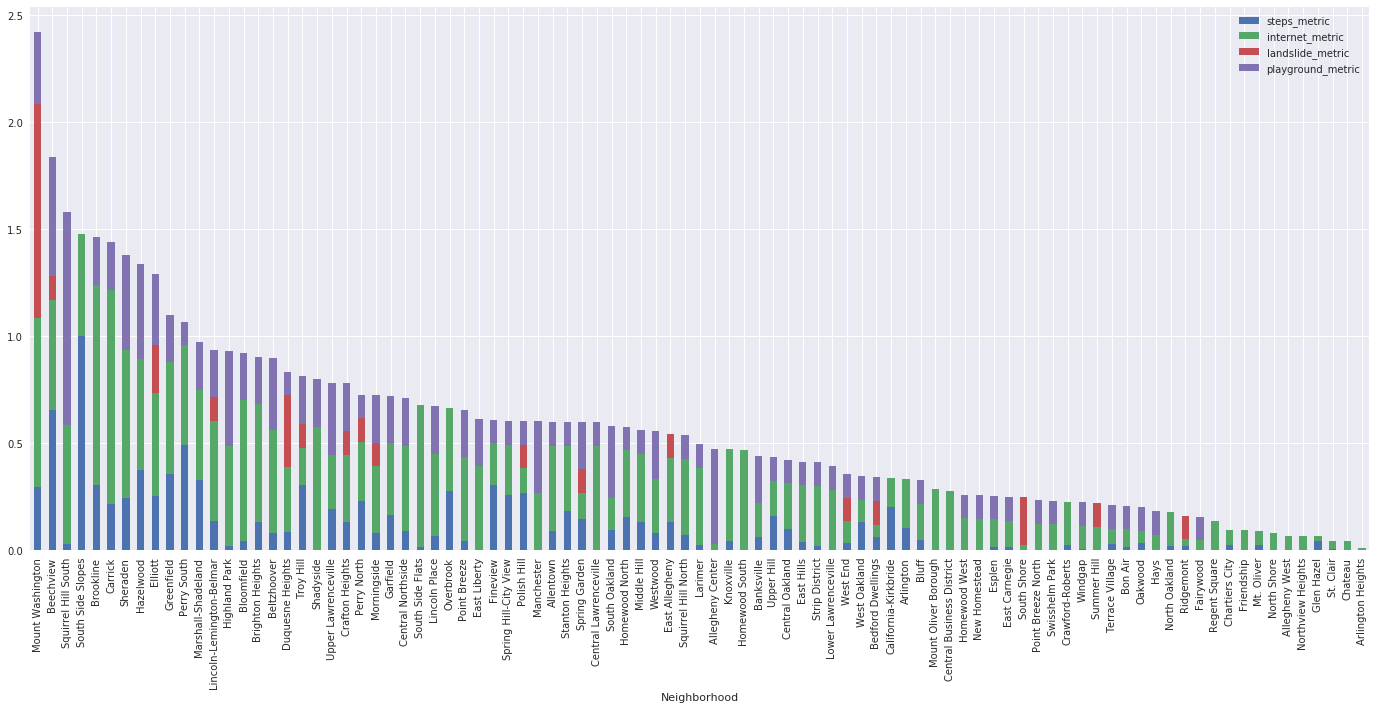

In [27]:
metrics.drop(columns='total').plot.bar(stacked=True,figsize = (24, 10))

In [28]:
print('Final Placings!')
for i in range(5):
    print(str(i+1) + ': ' + str(metrics.index[i]))

Final Placings!
1: Mount Washington
2: Beechview
3: Squirrel Hill South
4: South Side Slopes
5: Brookline


**Mount Washington wins!**

# Conclusions

### Ben

I might not know much about the city of Pittsburgh, but it's not surprising that Mount Washington won. I pass through the district on my way onto campus from my house, so I get to see it every now and then. Just off the small observation I've had of it, I can definitely understand how it won best neighborhood. I was pleasantly surprised to see that the landslide data directly affected the outcome. Had we not measured the landslide data at all, Beechview would have won! 
